In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as sklearn_PCA
%matplotlib inline

In [103]:
class PCA:
    def __init__(self, n_components=None, whiten=False):
        self.n_components = n_components
        self.whiten = whiten
        
    def fit(self, X):
        m = X.shape[0]
        X_mean = np.mean(X, axis=0)
        X_stand = X - X_mean
        
        if self.whiten:
            X_stand = X_stand / X_stand.std(axis=0)
        
        cov_matrix = np.dot(X_stand.T, X_stand) / (m - 1)
        self.eig_values, self.eig_vectors = np.linalg.eig(cov_matrix)
        return self
    
    def transform(self, X):
        X = X - np.mean(X, axis=0)
        if self.whiten:
            X = X / X.std(axis=0)
        result = X @ self.eig_vectors
        return result

In [84]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
pca = PCA(whiten=True)
pca.fit(X)
X_prime = pca.transform(X)

Text(0.5, 0, 'PC1')

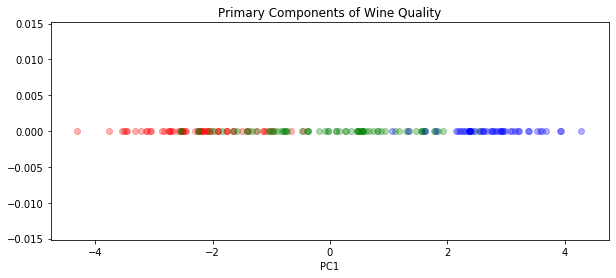

In [87]:
plt.figure(figsize=(10, 4))
for c in np.unique(wine.target):
    color = ['red', 'green', 'blue'][c]
    X_class = X_prime[wine.target == c]
    plt.scatter(X_class[:, 0], X_class[:, 1]*0, color=color, alpha=0.3)
plt.title("Primary Components of Wine Quality")
plt.xlabel("PC1")

In [92]:
from sklearn.datasets import load_digits

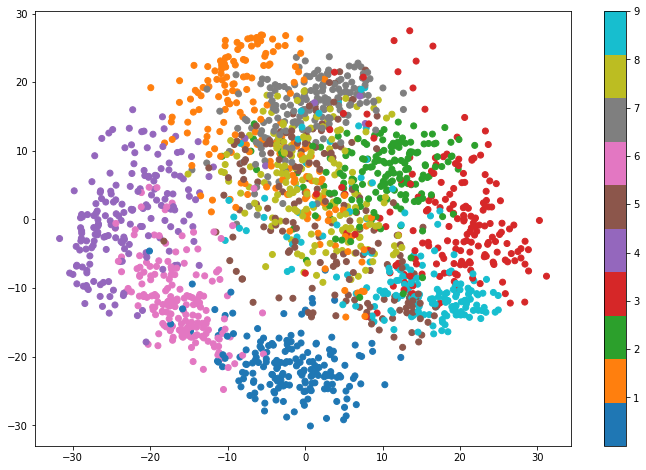

In [115]:
X = load_digits().data
Y = load_digits().target

pca = PCA()
pca.fit(X)
result = pca.transform(X)
result = result[:, :2]

plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1], c=Y, cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(ticks=range(1, 10))